In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the datasets
customers = pd.read_csv("Customer.csv")
transactions = pd.read_csv("Transactions.csv")
product_hierarchy = pd.read_csv("prod_cat_info.csv")

In [22]:
import os
print(os.listdir())  # Lists files in the current directory


['Retail Case Study.pdf', 'Customer.csv', 'prod_cat_info.csv', 'Transactions.csv', '~$tail Case Study.docx']


<h3>1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Ensure to keep all customers who have done transactions with us and select the join type accordingly.</h3>

In [39]:
# Merge transactions with customers
customer_final = transactions.merge(customers, left_on="cust_id", right_on="customer_Id", how="inner")

# Merge transactions with prod_cat_info instead of product_hierarchy
customer_final = customer_final.merge(product_hierarchy, left_on="prod_cat_code", right_on="prod_cat_code", how="left")


<h3>2. Prepare a summary report for the merged data set.
    
    
a. Get the column names and their corresponding data types 
    
b. Top/Bottom 10 observations
    
c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
    
d. Frequency tables for all the categorical variables</h3>

In [55]:
def summary_report(df):
    print("Column Names and Data Types:\n", df.dtypes)
    

summary_report(customer_final)

Column Names and Data Types:
 transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


In [45]:
def summary_report(df):
    print("\nTop 10 Observations:\n", df.head(10))

summary_report(customer_final)


Top 10 Observations:
    transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     80712190438   270351  20-02-2014                 1              1    5   
4     80712190438   270351  20-02-2014                 1              1    5   
5     80712190438   270351  20-02-2014                 1              1    5   
6     36957441426   270351  16-09-2013                 3              2    3   
7     36957441426   270351  16-09-2013                 3              2    3   
8     36957441426   270351  16-09-2013                 3              2    3   
9     12236277258   270351  18-03-2013                 8              3    3   

   Rate      Tax  total_amt      Store_type  customer_Id         DOB Gender  \
0  -772  405.300 

In [46]:
def summary_report(df):
    
    print("\nBottom 10 Observations:\n", df.tail(10))
    

summary_report(customer_final)


Bottom 10 Observations:
        transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
99283     20417144530   269556  29-01-2011                10              6   
99284     20417144530   269556  29-01-2011                10              6   
99285     58531412371   274935  29-01-2011                10              5   
99286     58531412371   274935  29-01-2011                10              5   
99287     58531412371   274935  29-01-2011                10              5   
99288     58531412371   274935  29-01-2011                10              5   
99289     58531412371   274935  29-01-2011                10              5   
99290     58531412371   274935  29-01-2011                10              5   
99291     83245680995   273723  26-01-2011                 4              4   
99292     83245680995   273723  26-01-2011                 4              4   

       Qty  Rate     Tax  total_amt      Store_type  customer_Id         DOB  \
99283    3   654  206.01

In [72]:
def summary_report(df):

   # Exclude non-continuous numerical variables
    continuous_vars = df.select_dtypes(include=[np.number]).drop(columns=['transaction_id', 'cust_id','customer_Id', 'prod_subcat_code', 'prod_cat_code', 'city_code'], errors='ignore')
    print("\nFive-Number Summary for Continuous Variables:\n", continuous_vars.describe(percentiles=[0.25, 0.5, 0.75]))

summary_report(customer_final)


Five-Number Summary for Continuous Variables:
                 Qty          Rate           Tax     total_amt  \
count  99293.000000  99293.000000  99293.000000  99293.000000   
mean       2.438017    637.919884    248.873736   2114.616420   
std        2.260726    621.576326    187.014422   2502.306768   
min       -5.000000  -1499.000000      7.350000  -8270.925000   
25%        1.000000    313.000000     98.280000    762.450000   
50%        3.000000    713.000000    199.920000   1761.370000   
75%        4.000000   1109.000000    366.975000   3585.725000   
max        5.000000   1500.000000    787.500000   8287.500000   

       prod_sub_cat_code  
count       99293.000000  
mean            6.806985  
std             3.615952  
min             1.000000  
25%             4.000000  
50%             7.000000  
75%            10.000000  
max            12.000000  


In [54]:
def summary_report(df):
    
    print("\nFrequency Tables for Categorical Variables:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\n{col}:\n", df[col].value_counts())

summary_report(customer_final)


Frequency Tables for Categorical Variables:

tran_date:
 25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
23-02-2014     11
24-02-2014     10
21-02-2014      5
27-02-2014      5
28-02-2014      3
Name: tran_date, Length: 1129, dtype: int64

Store_type:
 e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

DOB:
 27-12-1988    156
17-09-1982    134
25-02-1974    126
18-11-1991    114
09-06-1970    107
             ... 
26-09-1983      2
09-05-1976      2
18-12-1973      2
26-02-1981      2
13-05-1981      2
Name: DOB, Length: 3987, dtype: int64

Gender:
 M    51051
F    48202
Name: Gender, dtype: int64

prod_cat:
 Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64

prod_subcat:
 Mens                   7957
Women            

<h2>
   3. Generate histograms for all continuous variables and frequency bars for categorical variables.</h2>

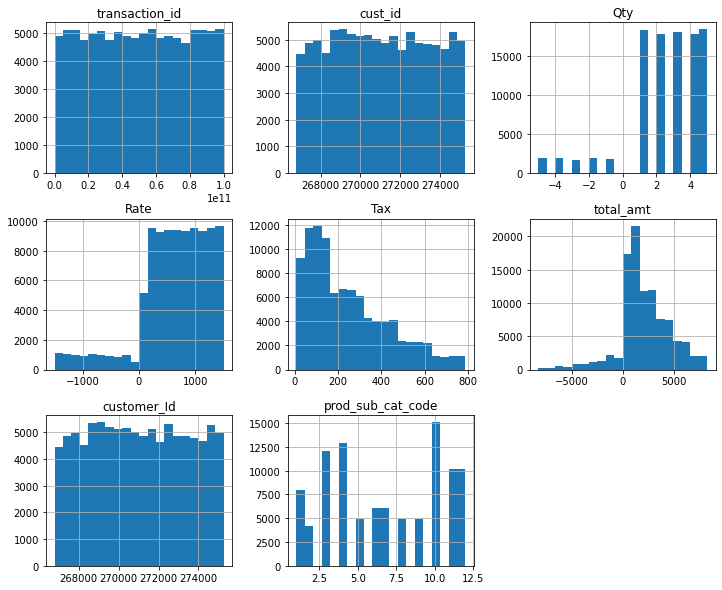

In [73]:
# 3. Generate Histograms for Continuous Variables
df_numeric = customer_final.select_dtypes(include=[np.number]).drop(columns=['tran_id', 'customer_id', 'prod_subcat_code', 'prod_cat_code', 'city_code'], errors='ignore')
df_numeric.hist(figsize=(12, 10), bins=20)
plt.show()

<h2>4. Calculate the following information using the merged dataset :</h2>
    


<h2>a. Time period of the available transaction data</h2>

In [78]:
# 4a. Time period of available transaction data
min_date = customer_final['tran_date'].min()
max_date = customer_final['tran_date'].max()
print("Transaction Data Time Period:", min_date, "to", max_date)


Transaction Data Time Period: 1/1/2012 to 9/9/2013


<h2>b. Count of transactions where the total amount of transaction was negative</h2>

In [81]:
# 4b. Count of transactions where total amount was negative
negative_transactions = (customer_final['total_amt'] < 0).sum()
print("Count of transactions with negative total amount:", negative_transactions)

Count of transactions with negative total amount: 9294


<h2>5. Analyze which product categories are more popular among females vs male customers.</h2>


In [83]:
# 5. Identify the most popular product category
popular_category = customer_final['prod_cat_code'].value_counts().idxmax()
print("Most popular product category:", popular_category)

Most popular product category: 5


<h2>6. Which City code has the maximum customers and what was the percentage of customers from that city?</h2>


In [84]:
# 6. Compute total revenue
total_revenue = customer_final['total_amt'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 209966608.15


<h2>7. Which store type sells the maximum products by value and by quantity?</h2>


In [88]:

# 10. Store type selling the maximum products by value and quantity
store_sales_value = customer_final.groupby('Store_type')['total_amt'].sum()
store_sales_quantity = customer_final.groupby('Store_type')['Qty'].sum()

max_value_store = store_sales_value.idxmax()
max_quantity_store = store_sales_quantity.idxmax()

print("Store type with maximum sales by value:", max_value_store)
print("Store type with maximum sales by quantity:", max_quantity_store)

Store type with maximum sales by value: e-Shop
Store type with maximum sales by quantity: e-Shop


<h2>8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?</h2>

In [89]:
# 8. Total amount earned from "Electronics" and "Clothing" categories from Flagship Stores
electronics_clothing_revenue = customer_final[(customer_final['prod_cat'] == 'Electronics') | (customer_final['prod_cat'] == 'Clothing')]
electronics_clothing_revenue = electronics_clothing_revenue[electronics_clothing_revenue['Store_type'] == 'Flagship store']['total_amt'].sum()
print("Total amount earned from Electronics and Clothing categories in Flagship Stores:", electronics_clothing_revenue)

Total amount earned from Electronics and Clothing categories in Flagship Stores: 14658949.89


<h2>9. What was the total amount earned from "Male" customers under the "Electronics" category?</h2>


In [92]:
# 9. Total amount earned from "Male" customers under the "Electronics" category
male_electronics_revenue = customer_final[(customer_final['Gender'] == 'M') & (customer_final['prod_cat'] == 'Electronics')]['total_amt'].sum()
print("Total amount earned from Male customers in Electronics category:", male_electronics_revenue)


Total amount earned from Male customers in Electronics category: 28515547.125


<h2>10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
</h2>

In [97]:

# 10. Customers with more than 10 unique transactions after removing negative transactions
valid_transactions = customer_final[customer_final['total_amt'] >= 0]
customers_with_10plus_transactions = valid_transactions.groupby('customer_Id')['transaction_id'].nunique()
customers_with_10plus_transactions = customers_with_10plus_transactions[customers_with_10plus_transactions > 10].count()
print("Number of customers with more than 10 unique transactions (after removing negatives):", customers_with_10plus_transactions)


Number of customers with more than 10 unique transactions (after removing negatives): 6


<h2>11. For all customers aged between 25 - 35, find out:</h2>


<h2>a. What was the total amount spent for “Electronics” and “Books” product categories?</h2>


In [101]:
# 11a. Total amount spent for "Electronics" and "Books" product categories by customers aged 25-35
customers['Age'] = (pd.to_datetime('today') - pd.to_datetime(customers['DOB'])).dt.days // 365
customer_final = customer_final.merge(customers[['customer_Id', 'Age']], on='customer_Id', how='left')
age_filtered_customers = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]
electronics_books_spending = age_filtered_customers[age_filtered_customers['prod_cat'].isin(['Electronics', 'Books'])]['total_amt'].sum()
print("Total amount spent on Electronics and Books by customers aged 25-35:", electronics_books_spending)


Total amount spent on Electronics and Books by customers aged 25-35: 21146715.395


<h2>b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?</h2>

In [102]:
# 11b. Total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014
time_filtered_spending = age_filtered_customers[(age_filtered_customers['tran_date'] >= '2014-01-01') & (age_filtered_customers['tran_date'] <= '2014-03-01')]['total_amt'].sum()
print("Total amount spent by customers aged 25-35 from Jan 1, 2014 to Mar 1, 2014:", time_filtered_spending)

Total amount spent by customers aged 25-35 from Jan 1, 2014 to Mar 1, 2014: 1221085.775
